In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df2 = pd.read_csv('test.csv')
df2.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
df2.shape

(5200, 4)

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
#Drop the null values
df = df.dropna()

In [10]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
y = df['label']

In [12]:
X = df.drop('label' ,axis = 1)

In [13]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [14]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [15]:
X.shape , y.shape

((18285, 4), (18285,))

In [16]:
import tensorflow as tf

In [17]:
tf.__version__

'2.11.0'

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense




In [19]:
voc_size = 5000

In [20]:
messages = X.copy()


In [21]:
messages['title'][2]

'Why the Truth Might Get You Fired'

In [22]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [23]:
messages.reset_index(inplace = True)

In [24]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [25]:
import nltk
import re
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.stem.porter import PorterStemmer # Stemming Process
ps = PorterStemmer()
corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]' , ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

In [28]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [29]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [30]:
onehot_repr = [one_hot(words , voc_size) for words in corpus]
onehot_repr

[[4815, 4151, 1854, 357, 4006, 2440, 1539, 203, 3955, 4641],
 [4454, 589, 1822, 487, 3863, 1588, 590],
 [3721, 3759, 3480, 1433],
 [4002, 1616, 4863, 828, 4495, 1526],
 [3432, 3863, 2599, 465, 2071, 2083, 3863, 2517, 2888, 3245],
 [3495,
  639,
  4115,
  4423,
  2373,
  2592,
  4034,
  4337,
  1156,
  2090,
  2542,
  1626,
  1004,
  1205,
  590],
 [1578, 533, 3895, 833, 1686, 2850, 3746, 450, 4631, 2714, 3876],
 [273, 1751, 78, 1829, 1826, 288, 2592, 4783, 4631, 2714, 3876],
 [2178, 4763, 1038, 2677, 4807, 4657, 2531, 3366, 2592, 1773],
 [1842, 1951, 1390, 2261, 1333, 4053, 4816, 3071],
 [4275, 1734, 743, 1712, 1410, 4361, 218, 3411, 4051, 4846, 1384],
 [828, 1663, 4006, 4657, 2592, 1826],
 [2439, 1445, 293, 3328, 281, 91, 1746, 1858, 2222],
 [178, 664, 3672, 1830, 4213, 2062, 4700, 4631, 2714, 3876],
 [1041, 4943, 3586, 3885, 1902, 4631, 2714, 3876],
 [58, 4347, 1033, 1462, 4924, 3851, 4353, 4507, 1431, 4078],
 [4495, 4378, 589],
 [1548, 1101, 3962, 1741, 2592, 3783, 2313, 590],
 [498

In [31]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [32]:
onehot_repr[1]

[4454, 589, 1822, 487, 3863, 1588, 590]

In [33]:
sent_length = 20
emmbedded_docs = pad_sequences(onehot_repr ,padding = 'pre' , maxlen = sent_length)
print(emmbedded_docs)

[[   0    0    0 ...  203 3955 4641]
 [   0    0    0 ... 3863 1588  590]
 [   0    0    0 ... 3759 3480 1433]
 ...
 [   0    0    0 ... 4631 2714 3876]
 [   0    0    0 ... 4061 4885 3992]
 [   0    0    0 ... 3373 2614 4586]]


In [35]:
emmbedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4454,  589, 1822,  487, 3863, 1588,  590])

In [36]:
# ----------Creating a model 

embedding_vector_features = 40 #each vacabulary has 40 features
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features ,input_length = sent_length))

model.add(LSTM(100))
model.add(Dense(1 , activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
len(emmbedded_docs) , y.shape

(18285, (18285,))

In [38]:
X_final = np.array(emmbedded_docs)
y_final = np.array(y)


In [39]:
X_final.shape , y_final.shape

((18285, 20), (18285,))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test  =train_test_split(X_final ,y_final , test_size = 0.33 ,random_state = 42)

In [41]:
model.fit(X_train, y_train, validation_data = (X_test , y_test) , epochs = 10 , batch_size =64 )


Epoch 1/10
192/192 [==============================] - 16s 54ms/step - loss: 0.3309 - accuracy: 0.8434 - val_loss: 0.2033 - val_accuracy: 0.9171
Epoch 2/10
192/192 [==============================] - 9s 47ms/step - loss: 0.1409 - accuracy: 0.9456 - val_loss: 0.2156 - val_accuracy: 0.9079
Epoch 3/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0976 - accuracy: 0.9628 - val_loss: 0.2240 - val_accuracy: 0.9145
Epoch 4/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0681 - accuracy: 0.9763 - val_loss: 0.2762 - val_accuracy: 0.9130
Epoch 5/10
192/192 [==============================] - 9s 46ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 0.2647 - val_accuracy: 0.9082
Epoch 6/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.3539 - val_accuracy: 0.9115
Epoch 7/10
192/192 [==============================] - 9s 46ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.3937 - val_accuracy: 0.915

In [ ]:
#  Adding Dropout

# from tensorflow.keras.layers import Dropout
# ## Creating model

# embedding_vector_features = 40
# model = Sequential()
# model.add(Embedding(voc_size ,  embedding_vector_features ,input_length = sent_length))
# model.add(dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation= 'sigmoid'))
# model.compile(loss='binary_crossentropy', optimzer = 'adam' , metrics = ['accuracy'])


In [42]:
#Performance Metrics and Accuracy

y_pred =model.predict(X_test)


189/189 [==============================] - 3s 11ms/step


In [43]:
y_pred = np.where(y_pred> 0.6  ,1 ,0)   

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test , y_pred)

array([[3114,  305],
       [ 237, 2379]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3419
           1       0.89      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



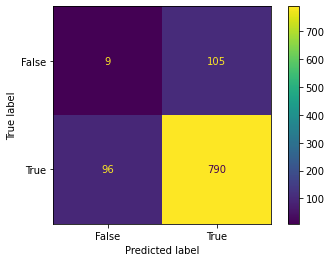

In [48]:
from sklearn import metrics
y_test = np.random.binomial(1,.9,size = 100)
y_pred = np.random.binomial(1,.9,size = 100)

confusion_matrix = metrics.confusion_matrix(y_test , y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()